Un notebook propre et commenté (introduction,
analyses, conclusion, etc) contenant : le procédé de
développement de votre outil, du prétraitement à la
modélisation des données, en passant par l’analyse
exploratoire.

Pensez à répondre à la problématique.

In [1]:
import pandas as pd 
from datetime import datetime
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('data\\raw\\marketing_campaign.csv' , sep='	')

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

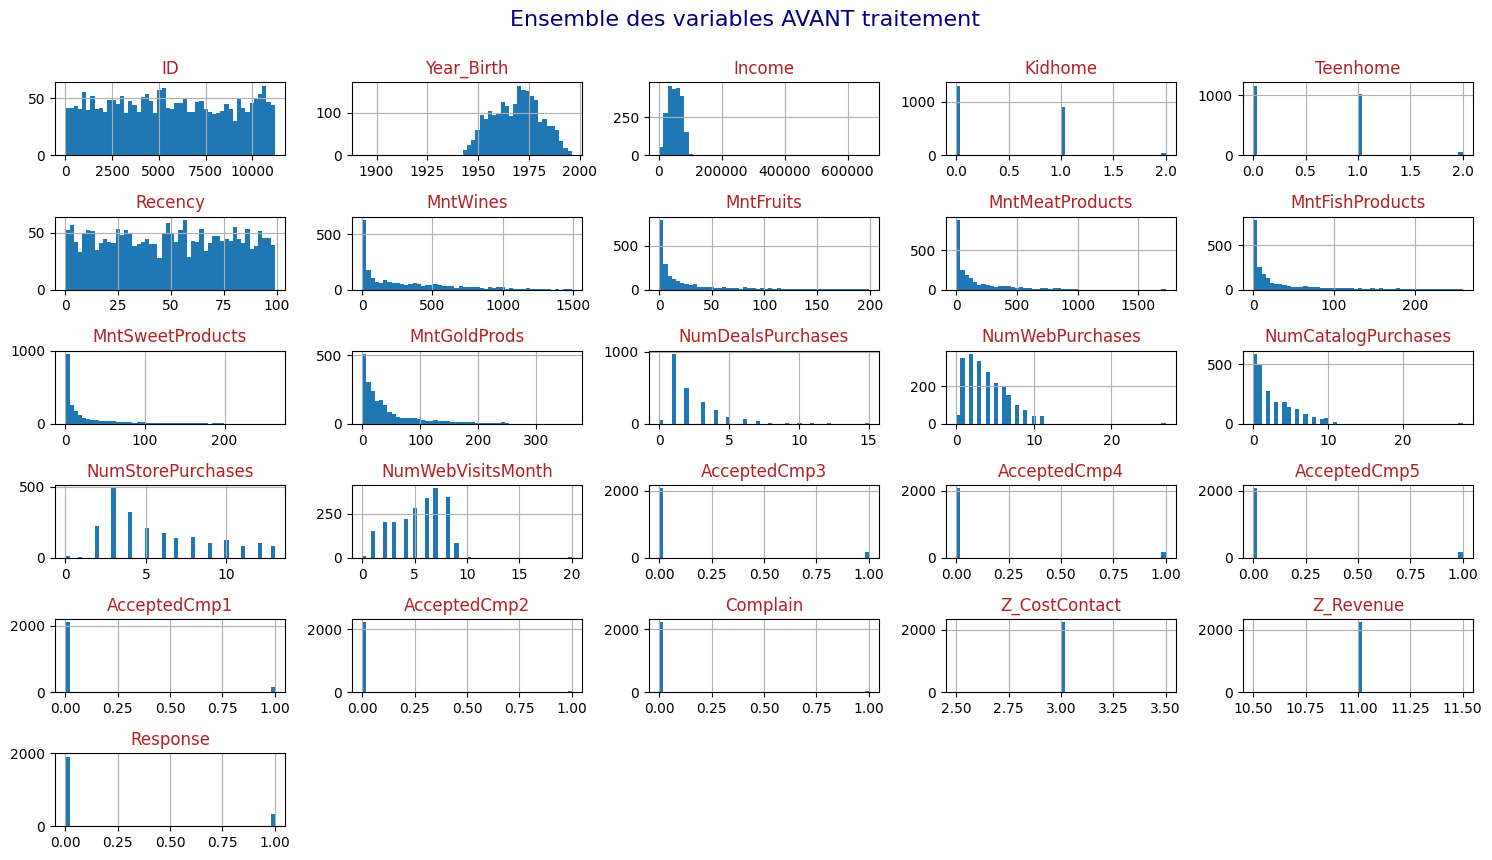

In [3]:
axes = df.hist(bins=50, figsize=(15,9))
plt.suptitle("Ensemble des variables AVANT traitement", fontsize=16, color="navy")
# Modifier la couleur des titres individuels
for ax in axes.ravel():  # ravel() aplatit la grille d'axes
    ax.set_title(ax.get_title(), color='firebrick')

plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()

# Nettoyage


In [4]:
marketing_campaign_clean = df.copy()

In [5]:
# on voit qu'il y a 24 null dans la colonne Income , nous allons donc les supprimer pour ne pas fausser le model
print(marketing_campaign_clean.isnull().sum())

marketing_campaign_clean = marketing_campaign_clean.dropna(subset=['Income'])

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


In [6]:
# certaines données sont erronées pour les années de naissance , au lieu d'etre a 1900 c'est a 1800 
print(marketing_campaign_clean[marketing_campaign_clean['Year_Birth'] < 1920]['Year_Birth'])
marketing_campaign_clean.loc[marketing_campaign_clean['Year_Birth'] < 1920, 'Year_Birth'] += 100

192    1900
239    1893
339    1899
Name: Year_Birth, dtype: int64


In [7]:
#passage de la colonne Dt_Customer en datetime
marketing_campaign_clean['Dt_Customer'] = pd.to_datetime(marketing_campaign_clean['Dt_Customer'], format="%d-%m-%Y", errors='coerce')
# toutes les dt_customers sont situés entre 2012 et 2015
marketing_campaign_clean[(marketing_campaign_clean['Dt_Customer'] > '01-01-2015') | (marketing_campaign_clean['Dt_Customer'] < '01-01-2012')]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


In [8]:


# Générer une map automatique pour que les strings soient remplacées par des entiers
education_map = {val: i+1 for i, val in enumerate(marketing_campaign_clean['Education'].dropna().unique())}
marital_status_map = {val: i+1 for i, val in enumerate(marketing_campaign_clean['Marital_Status'].dropna().unique())}

marketing_campaign_clean['Education'] = marketing_campaign_clean['Education'].map(education_map)
marketing_campaign_clean['Marital_Status'] = marketing_campaign_clean['Marital_Status'].map(marital_status_map)


# Transformation des dates en entiers 
marketing_campaign_clean['Age'] = 2025 - marketing_campaign_clean['Year_Birth'] 
marketing_campaign_clean['Customer_Seniority'] = (pd.to_datetime('2025-01-01') - marketing_campaign_clean['Dt_Customer']).dt.days

# standardisation des données
marketing_campaign_clean['Income'] = marketing_campaign_clean['Income'] // 12 # pour avoir un revenu mensuel et baisser l'echelle

# Suppression des colonnes non nécessaires
marketing_campaign_clean = marketing_campaign_clean.drop(columns=['ID', 'Z_CostContact','Z_Revenue', 'Year_Birth', 'Dt_Customer'])

marketing_campaign_clean.to_csv('data\\processed\\marketing_campaign_clean.csv', index=False, sep=',')

In [9]:
marketing_campaign_clean.describe()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Customer_Seniority
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,1.980596,2.501805,4353.516697,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,...,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,0.150271,56.044224,4192.521209
std,1.256346,1.073378,2097.757972,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,...,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.357417,11.739453,202.434667
min,1.000000,1.000000,144.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,3839.000000
25%,1.000000,2.000000,2941.500000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48.000000,4019.000000
50%,1.000000,3.000000,4281.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000,4194.500000
75%,3.000000,3.000000,5709.750000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,66.000000,4368.000000
max,5.000000,8.000000,55555.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,85.000000,4538.000000
